In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA & Feature Engenering

In [2]:
data = pd.read_csv("Titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [6]:
data.shape

(891, 9)

In [7]:
# Convert traget column in to catigorical to analysis
data["Survived"] = data["Survived"].map({0:"Not Survived",1:"Survived"})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [9]:
# Check Nan Values in dataf set
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# check Duplicet VAlue in data set
data.duplicated().sum()

107

In [11]:
# Drope Duplicet Values
data.drop_duplicates(inplace=True)

In [12]:
# handel Nan Values Using Median And Mode
data["Age"] = data["Age"].fillna(np.nanmedian(data["Age"]))
data["Cabin"] = data["Cabin"].fillna("G6")
data["Embarked"] = data["Embarked"].fillna("S")

In [15]:
# Saprate numerical And Catigorical Columns
catigorical_features = data.select_dtypes(include= "object").columns
numerical_features = data.select_dtypes(exclude = "object").columns
print(catigorical_features)
print(numerical_features)

Index(['Survived', 'Sex', 'Cabin', 'Embarked'], dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [16]:
# Check the unique value of catigorical data
for i in catigorical_features:
    print(i,data[i].unique())

Survived ['Not Survived' 'Survived']
Sex ['male' 'female']
Cabin ['G6' 'C85' 'C123' 'E46' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33' 'B30'
 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C5

In [17]:
# Check the unique value of catigorical data
for i in catigorical_features:
    print(i,data[i].value_counts())

Survived Not Survived    461
Survived        323
Name: Survived, dtype: int64
Sex male      491
female    293
Name: Sex, dtype: int64
Cabin G6             585
C23 C25 C27      4
B96 B98          4
D                3
F33              3
              ... 
C32              1
E34              1
C7               1
C54              1
C148             1
Name: Cabin, Length: 147, dtype: int64
Embarked S    570
C    155
Q     59
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Sex'>

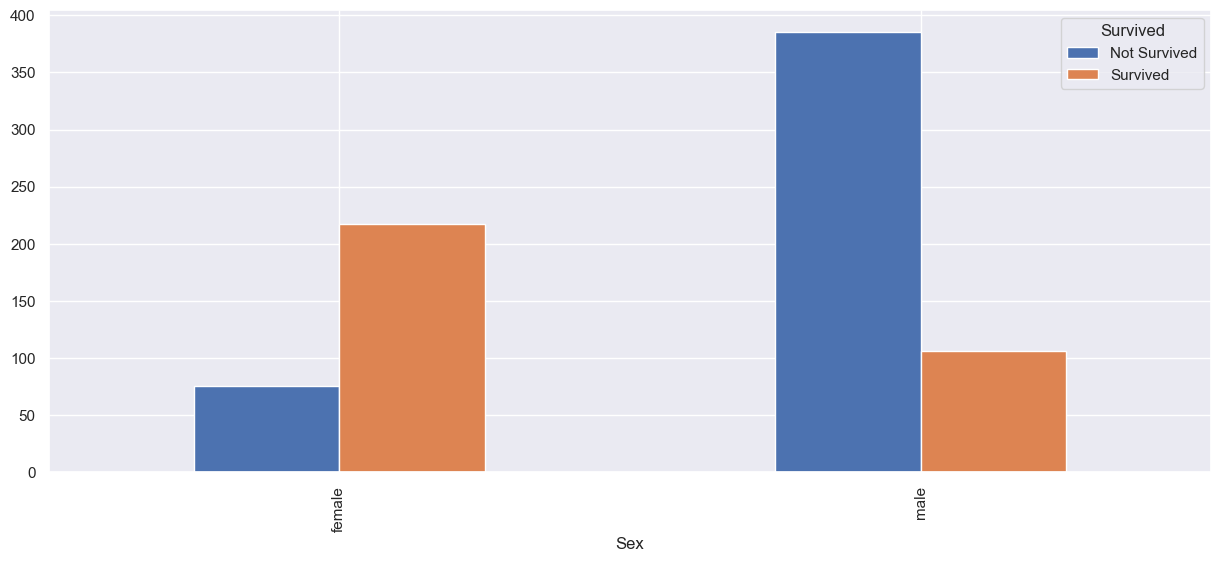

In [20]:
sex = pd.crosstab(data["Sex"],data["Survived"])
sex.plot(kind="bar")

<AxesSubplot:xlabel='Embarked'>

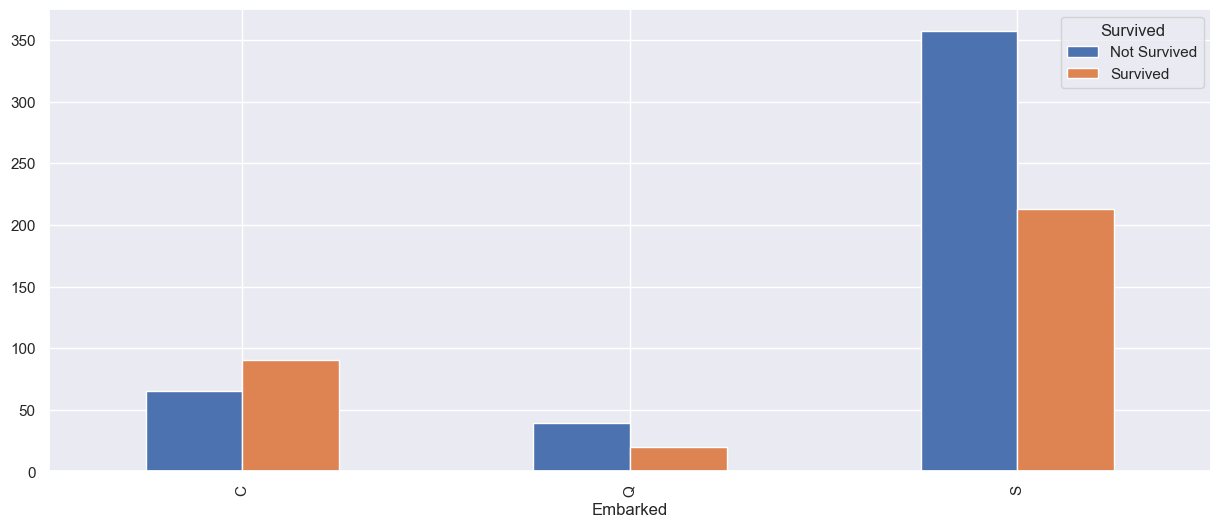

In [21]:
Embarked = pd.crosstab(data["Embarked"],data["Survived"])
Embarked.plot(kind="bar")

<AxesSubplot:ylabel='Survived'>

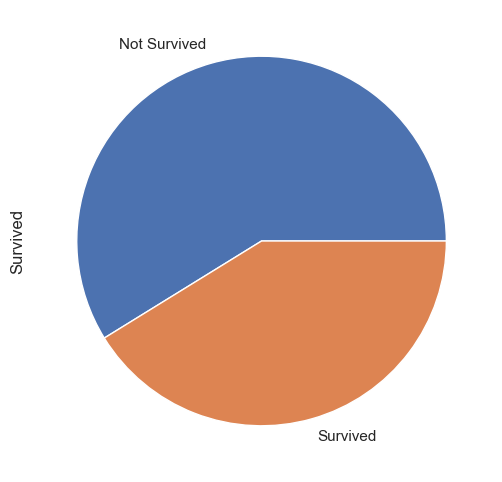

In [24]:
data["Survived"].value_counts().plot.pie()

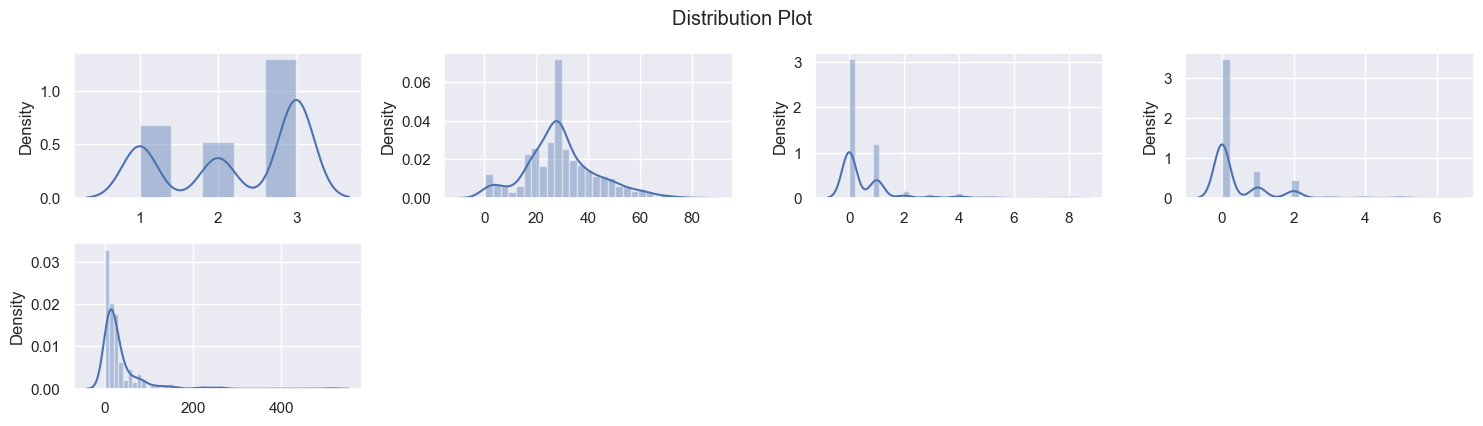

In [25]:
try:
    plt.suptitle("Distribution Plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

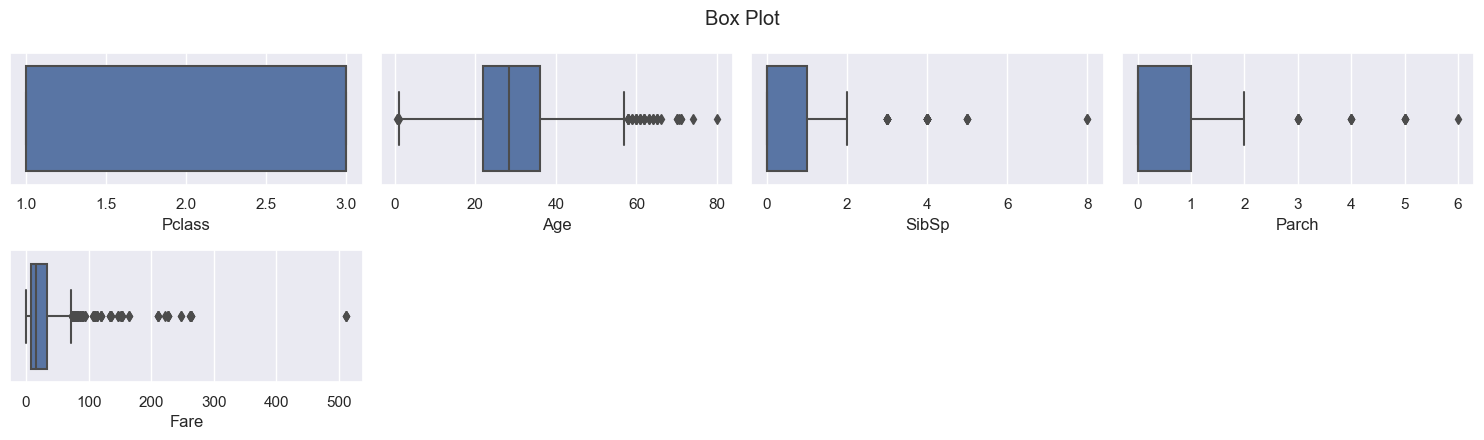

In [26]:
try:
    plt.suptitle("Box Plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

In [28]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features = ['Survived', 'Sex', 'Cabin', 'Embarked']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [34]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,0.626276,29.650408,0.522959,0.415816,34.711740,127.200255,1.529337
std,0.492507,0.855056,0.484101,13.734925,0.986231,0.836922,52.160151,36.971695,0.803350
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,8.050000,143.750000,1.000000
50%,0.000000,3.000000,1.000000,28.250000,0.000000,0.000000,15.900000,145.000000,2.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.109350,145.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,146.000000,2.000000


<AxesSubplot:>

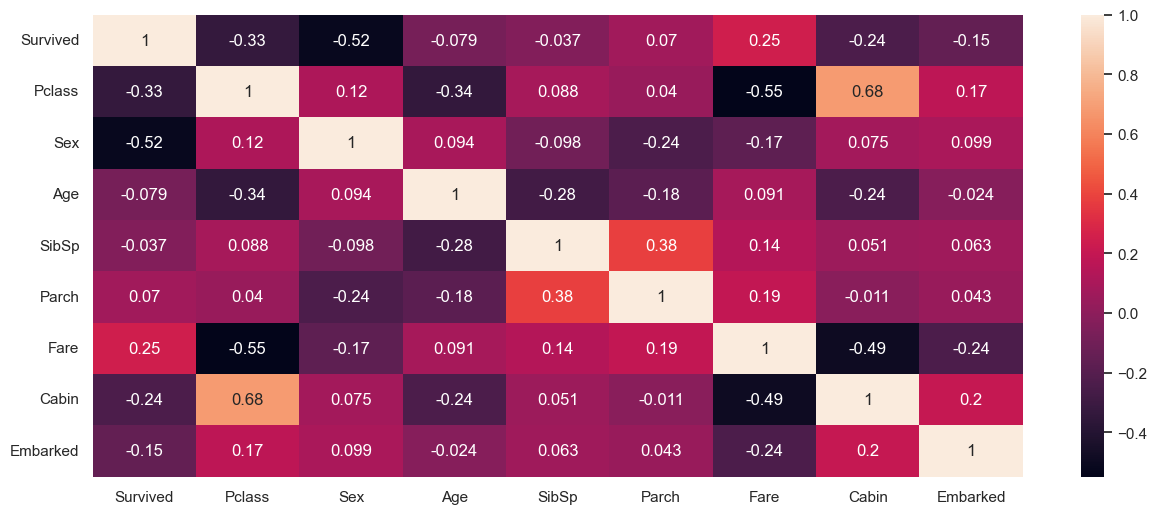

In [35]:
sns.heatmap(data.corr(),annot=True)

## Model Traning

In [36]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.00,1,0,7.2500,145,2
1,1,1,0,38.00,1,0,71.2833,81,0
2,1,3,0,26.00,0,0,7.9250,145,2
3,1,1,0,35.00,1,0,53.1000,55,2
4,0,3,1,35.00,0,0,8.0500,145,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.00,0,5,29.1250,145,1
887,1,1,0,19.00,0,0,30.0000,30,2
888,0,3,0,28.25,1,2,23.4500,145,2
889,1,1,1,26.00,0,0,30.0000,60,0


In [40]:
# Saprate Dependent And Indipendent
x = data.drop("Survived",axis=1)
y = data["Survived"]

In [42]:
# Saprate numerical And Catigorical Columns
catigorical_features = x.select_dtypes(include= "object").columns
numerical_features = x.select_dtypes(exclude = "object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [44]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
    
)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [45]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(627, 8)
(627,)
(157, 8)
(157,)


In [48]:
# Transform Data usingPreprocessing Obj
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [50]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

In [51]:
tree = DecisionTreeClassifier()

In [52]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
tree.score(X_train,y_train)

0.9872408293460925

In [54]:
y_predict = tree.predict(X_test)

In [55]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[72 16]
 [22 47]]
PRECISION_SCORE: 0.746031746031746
RECALL_SCORE: 0.6811594202898551
F1_SCORE: 0.7121212121212122
ACCURACY_SCORE: 0.7579617834394905


(None, None, None, None, None)

In [56]:
param_grid = {
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3]
}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_search = GridSearchCV(estimator=tree,param_grid=param_grid,cv=5)

In [59]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [60]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=4)

In [61]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [62]:
tree = DecisionTreeClassifier(max_depth= 6, min_samples_leaf =  3, min_samples_split = 4)

In [63]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=4)

In [64]:
tree.score(X_train,y_train)

0.8500797448165869

In [65]:
y_predict = tree.predict(X_test)

In [66]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[78 10]
 [27 42]]
PRECISION_SCORE: 0.8076923076923077
RECALL_SCORE: 0.6086956521739131
F1_SCORE: 0.6942148760330579
ACCURACY_SCORE: 0.7643312101910829


(None, None, None, None, None)

In [67]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        88
           1       0.81      0.61      0.69        69

    accuracy                           0.76       157
   macro avg       0.78      0.75      0.75       157
weighted avg       0.77      0.76      0.76       157

